<a href="https://colab.research.google.com/github/yhp2205/2023Project/blob/main/Note/%EA%B3%A8%EB%AA%A9%EC%83%81%EA%B6%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 상일동 골목상권 EDA

### drive mount 및 package import

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 한글 폰트 설치 (완료 후 런타임 재시작)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')

### 파일 읽어오기

In [ ]:
Path22 = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/서울시_상권분석서비스(상권배후지_추정매출)_2022년.csv'
seoul22 = pd.read_csv(Path22, encoding = 'cp949')
Path21 = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2021년.csv'
seoul21 = pd.read_csv(Path21, encoding = 'cp949')
Path20 = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2020년.csv'
seoul20 = pd.read_csv(Path20, encoding = 'cp949')
Path19 = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2019년.csv'
seoul19 = pd.read_csv(Path19, encoding = 'cp949')
Path18 = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/Project/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2018년.csv'
seoul18 = pd.read_csv(Path18, encoding = 'cp949')

In [ ]:
seoul22 = seoul22[seoul22['상권_코드']==2111089]
seoul21 = seoul21[seoul21['상권_코드']==2111089]
seoul20 = seoul20[seoul20['상권_코드']==2111089]
seoul19 = seoul19[seoul19['상권_코드']==2111089]
seoul18 = seoul18[seoul18['상권_코드']==2111089]

In [ ]:
seoul = pd.concat([seoul18, seoul19, seoul20, seoul21, seoul22])

### 데이터 shape 확인

In [ ]:
seoul.shape

(836, 80)

### 데이터 전처리

#### '기준년도 분기'  컬럼 생성

In [ ]:
# 기준 연, 분기별 코드 string으로 변환 후 새 칼럼으로 합치기
seoul['기준_년_코드'] = seoul['기준_년_코드'].astype(str)
seoul['기준_분기_코드'] = seoul['기준_분기_코드'].astype(str)
seoul['기준년도_분기'] = seoul[['기준_년_코드','기준_분기_코드']].agg("_".join, axis=1)

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 58648 to 185719
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년_코드          836 non-null    object
 1   기준_분기_코드         836 non-null    object
 2   상권_구분_코드         836 non-null    object
 3   상권_구분_코드_명       836 non-null    object
 4   상권_코드            836 non-null    int64 
 5   상권_코드_명          836 non-null    object
 6   서비스_업종_코드        836 non-null    object
 7   서비스_업종_코드_명      836 non-null    object
 8   분기당_매출_금액        836 non-null    int64 
 9   분기당_매출_건수        836 non-null    int64 
 10  주중_매출_비율         836 non-null    int64 
 11  주말_매출_비율         836 non-null    int64 
 12  월요일_매출_비율        836 non-null    int64 
 13  화요일_매출_비율        836 non-null    int64 
 14  수요일_매출_비율        836 non-null    int64 
 15  목요일_매출_비율        836 non-null    int64 
 16  금요일_매출_비율        836 non-null    int64 
 17  토요일_매출_비율        836 non-nul

#### 컬럼 선택 후 sangil 변수에 할당

In [ ]:
Columns = ['기준년도_분기', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

sangil_df = seoul[Columns]

In [ ]:
sangil_df

,기준년도_분기,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
58648,2018_1,한식음식점,3896938695,114296,1808703659,754799776,12089456,193342599,550012459,832244499,686826561,288987866
58649,2018_1,중식음식점,670843923,18931,325766974,127839186,3147732,49036183,126992476,155467996,89768535,29193250
58650,2018_1,일식음식점,174733088,5518,80512120,45837381,2767409,20091325,39785738,33821571,21667838,8215616
58651,2018_1,양식음식점,218705680,7654,101838565,74868910,231515,24752028,60166091,43241817,39421813,8894210
58652,2018_1,제과점,250041363,32909,104309370,104373694,1684539,25387410,56642946,74062830,34531474,16373866
...,...,...,...,...,...,...,...,...,...,...,...,...
182325,2022_1,문구,73639688,6762,29471866,29317411,807726,6413568,21428803,18757656,5953238,5428286
183190,2022_1,한식음식점,3195852653,90973,1988855589,809004294,3988139,199324679,521248725,787426497,825592236,460279597
184665,2022_1,제과점,205771380,24901,95166079,85621423,226160,17367230,58350021,63342616,27038549,14462929
184928,2022_1,커피-음료,1519637667,181753,847688576,547347585,2048773,198043264,536130388,409328860,199201390,50283489


In [ ]:
sangil_df = sangil_df.groupby('서비스_업종_코드_명').sum().sort_values('분기당_매출_금액', ascending = False)
sangil_df.reset_index(inplace = True)

<ipython-input-13-f22492e25ab2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sangil_df = sangil_df.groupby('서비스_업종_코드_명').sum().sort_values('분기당_매출_금액', ascending = False)


<ipython-input-14-b61c3f6c2e5d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values], rotation = 20)


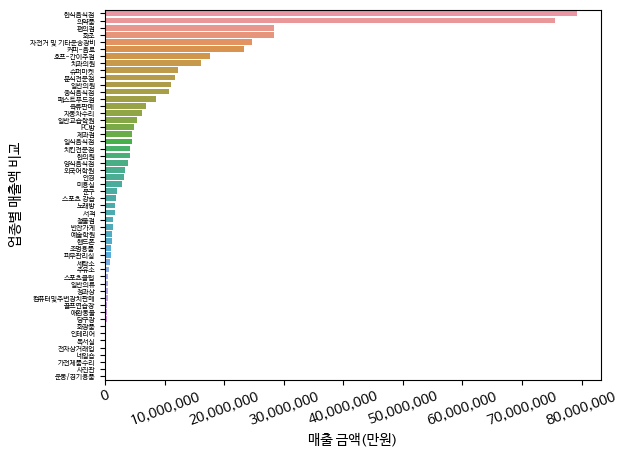

In [ ]:
df3plot = sns.barplot(data = sangil_df,
            x = '분기당_매출_금액',
            y = '서비스_업종_코드_명',
            orient='h')

df3plot.set_ylabel('업종별 매출액 비교', fontsize=10)
df3plot.set_xlabel('매출 금액(만원)', fontsize=10)


plt.ticklabel_format(axis='x',useOffset=False, style='plain')
current_values = plt.gca().get_xticks()/1000
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values], rotation = 20)
plt.gca().set_yticklabels(sangil_df['서비스_업종_코드_명'],size = 5)

plt.show()

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
sangil_df = seoul[Columns]
sangil_sales = sangil_df.pivot(index='기준년도_분기', columns='서비스_업종_코드_명', values='분기당_매출_금액')

In [ ]:
#df = seoul.groupby(['기준년도_분기','서비스_업종_코드_명']).sum().sort_values(['기준년도_분기','분기당_매출_금액'], ascending=True)

In [ ]:
sangil_sales

서비스_업종_코드_명,PC방,가전제품수리,골프연습장,네일숍,노래방,당구장,독서실,문구,미용실,반찬가게,...,컴퓨터및주변장치판매,패스트푸드점,편의점,피부관리실,한식음식점,한의원,핸드폰,호프-간이주점,화장품,화초
기준년도_분기,,,,,,,,,,,,,,,,,,,,,
2018_1,246392071.0,NaN,32127024.0,2483603.0,150812275.0,21559858.0,10999342.0,98513663.0,90232239.0,NaN,...,141388927.0,409543951.0,1402567323.0,24933387.0,3896938695.0,274311815.0,260060376.0,1332253305.0,50909946.0,1386797767.0
2018_2,194539604.0,1840105.0,17200394.0,3345108.0,148748611.0,18038433.0,15043715.0,116459204.0,104105042.0,NaN,...,179163366.0,446414109.0,1632448050.0,24154799.0,4223048381.0,261591063.0,292518679.0,1386186054.0,42504587.0,2474795860.0
2018_3,186794988.0,2242074.0,16999097.0,3525282.0,146055144.0,19250046.0,23369371.0,141025844.0,97711395.0,NaN,...,66817488.0,469932217.0,1754927126.0,23126934.0,4061230514.0,236807057.0,425761151.0,1505276125.0,46258049.0,1652533181.0
2018_4,144143624.0,NaN,22091375.0,1721822.0,177796408.0,15763763.0,12657704.0,114687894.0,109120870.0,NaN,...,89030384.0,451862158.0,1684661224.0,66002217.0,4366886816.0,287761905.0,136534427.0,2055083908.0,25719343.0,1031630539.0
2019_1,218904012.0,NaN,24417368.0,NaN,98856421.0,16273314.0,NaN,111776918.0,85518156.0,NaN,...,NaN,432906110.0,1242332010.0,12334365.0,3361197243.0,207033749.0,NaN,519627742.0,NaN,820983733.0
2019_2,NaN,NaN,22353818.0,1004566.0,111158563.0,11031915.0,NaN,79615454.0,89236112.0,NaN,...,NaN,410603076.0,1459894208.0,66297214.0,3501496925.0,145747356.0,NaN,542253252.0,NaN,1098704311.0
2019_3,376221270.0,NaN,20236490.0,1894977.0,121452076.0,10624347.0,NaN,63761180.0,86438956.0,NaN,...,NaN,438725007.0,1438109513.0,32120744.0,3642435584.0,158132931.0,NaN,537747935.0,NaN,451948156.0
2019_4,418151862.0,NaN,11709928.0,863013.0,101013128.0,15126987.0,NaN,158762099.0,139715411.0,216000000.0,...,NaN,441308379.0,1289057650.0,30605779.0,4227762315.0,220294018.0,NaN,452281734.0,NaN,885616974.0
2020_1,448581993.0,NaN,13730975.0,200913.0,65112188.0,17328698.0,NaN,96567533.0,145388774.0,NaN,...,NaN,430711057.0,1335902903.0,51136223.0,3722754146.0,126265216.0,NaN,455887939.0,28000000.0,1500555704.0


In [ ]:
sangil_sales.columns

Index(['PC방', '가전제품수리', '골프연습장', '네일숍', '노래방', '당구장', '독서실', '문구', '미용실',
       '반찬가게', '분식전문점', '사진관', '서적', '세탁소', '슈퍼마켓', '스포츠 강습', '스포츠클럽', '안경',
       '애완동물', '양식음식점', '예술학원', '외국어학원', '운동/경기용품', '육류판매', '의약품', '인테리어',
       '일반교습학원', '일반의류', '일반의원', '일식음식점', '자동차수리', '자전거 및 기타운송장비', '전자상거래업',
       '제과점', '조명용품', '주유소', '중식음식점', '철물점', '청과상', '치과의원', '치킨전문점', '커피-음료',
       '컴퓨터및주변장치판매', '패스트푸드점', '편의점', '피부관리실', '한식음식점', '한의원', '핸드폰',
       '호프-간이주점', '화장품', '화초'],
      dtype='object', name='서비스_업종_코드_명')

In [ ]:
sangil_sales.sum().sort_values(ascending = False).head(10).index

Index(['한식음식점', '의약품', '편의점', '화초', '자전거 및 기타운송장비', '커피-음료', '호프-간이주점', '치과의원',
       '슈퍼마켓', '분식전문점'],
      dtype='object', name='서비스_업종_코드_명')

In [ ]:
sangil_sales = sangil_sales[sangil_sales.sum().sort_values(ascending = False).head(10).index]

<ipython-input-21-2949b386956f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, '매출(만원)')

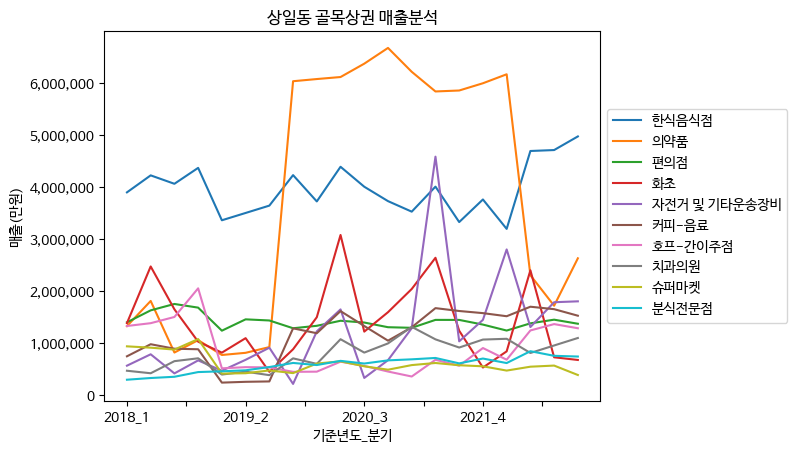

In [ ]:
ax3 = sangil_sales.plot(title = '상일동 골목상권 매출분석')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax3.set_ylabel("매출(만원)")

<ipython-input-22-5980ac243aed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


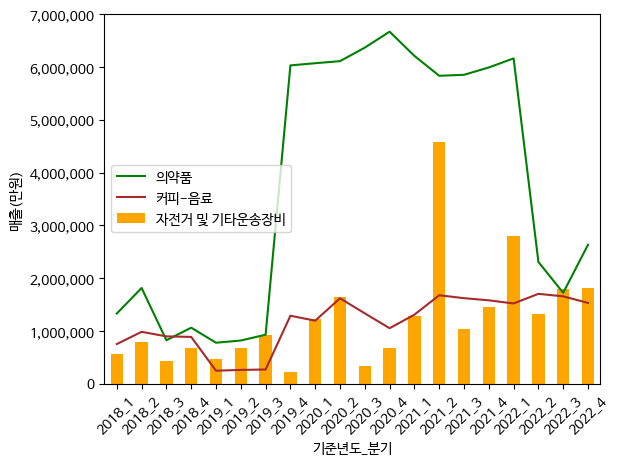

In [ ]:
ax = sangil_sales['의약품'].plot.line(color='green')
ax = sangil_sales['커피-음료'].plot.line(color='brown')
ax_2 = sangil_sales['자전거 및 기타운송장비'].plot.bar(ax=ax, color='orange')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
ax_2.set_xticklabels(sangil_sales.index, rotation=45)

current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_2.set_ylabel("매출(만원)")

ax_2.legend()

In [ ]:
sangil_med = seoul[seoul['서비스_업종_코드_명']=="의약품"]

In [ ]:
sangil_med.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
sangil_med_mw = sangil_med[['기준년도_분기', '남성_매출_금액', '여성_매출_금액', '남성_매출_건수', '여성_매출_건수']]

sangil_med_mw.set_index('기준년도_분기', inplace = True)

<ipython-input-26-9a7ad69e29e8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


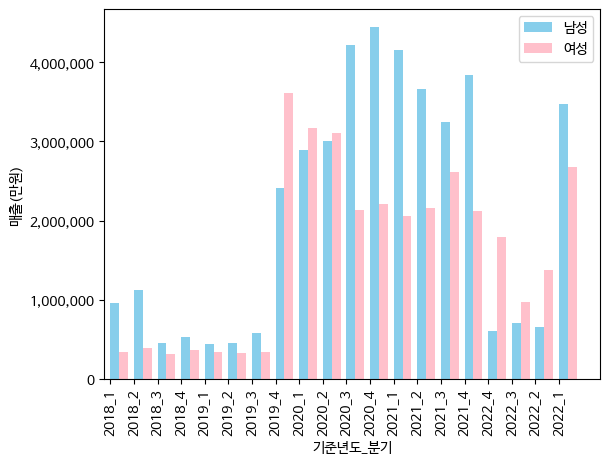

In [ ]:
labels = ['남성', '여성']
colors = ['skyblue', 'pink']
ax_m = sangil_med_mw.plot.bar(color=colors, width = 1.5, align='edge')
#ax_w = df2_mw['여성_매출_금액'].plot.bar(color='pink')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
#ax_w.set_xticklabels(df2_mw.index)

current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_m.set_ylabel("매출(만원)")

ax_m.legend(labels)

<ipython-input-27-6869666804c6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


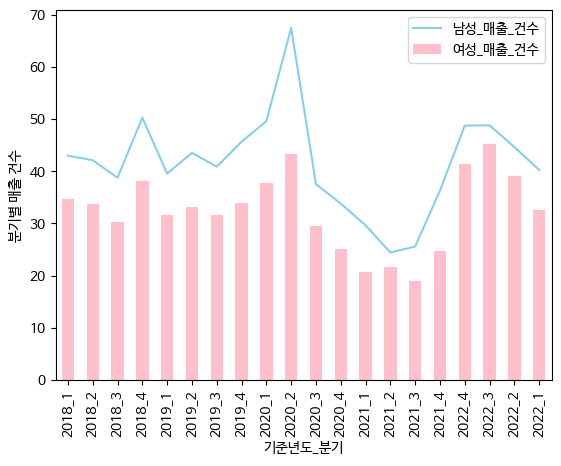

In [ ]:
ax_m = sangil_med_mw['남성_매출_건수'].plot.line(color='skyblue')
ax_w = sangil_med_mw['여성_매출_건수'].plot.bar(ax=ax_m, color='pink')

plt.ticklabel_format(axis='y',useOffset=False, style='plain')
#ax_w.set_xticklabels(df2_mw.index)

current_values = plt.gca().get_yticks()/1000
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

ax_w.set_ylabel("분기별 매출 건수")

ax_w.legend()

In [ ]:
sangil_med_age = sangil_med[['기준년도_분기', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

In [ ]:
sangil_med_age.set_index("기준년도_분기", inplace = True)
sangil_med_age = sangil_med_age.transpose()

In [ ]:
sangil_med_age

기준년도_분기,2018_1,2018_2,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4,2021_1,2021_2,2021_3,2021_4,2022_4,2022_3,2022_2,2022_1
연령대_10_매출_금액,2549873,3525815,2508893,3858026,1491596,3550613,3937796,2949894,2254400,1787513,1618997,2705795,1147246,1256278,2578103,2684420,1816540,1484556,1838503,1261986
연령대_20_매출_금액,53017084,48788879,47853390,54220535,49931163,42432250,54460106,64737339,68929630,81945567,66590429,56524151,51248600,38229840,31417854,45572172,62322019,63050742,61492332,67848173
연령대_30_매출_금액,144384907,176228742,142634280,166514912,136175753,116955808,244748572,1063180546,1289906203,1206263098,1202896561,1291768859,806890162,542488310,643861749,603454936,1463017459,605433105,1043645529,498986765
연령대_40_매출_금액,171263411,194484358,160301499,200723719,164034668,180188096,164956168,4175636468,3706193817,3591177862,4243034469,4069945623,4563588898,4774942161,4792711665,4878628925,292713749,316468295,318778465,5046905792
연령대_50_매출_금액,213423865,290131966,217336540,239335208,224998849,229827360,234828072,245958491,274121445,340783413,271728798,344990749,254479862,269605821,159089543,193078516,249357215,325184809,246874707,282849435
연령대_60_이상_매출_금액,714063471,801416605,202650182,232117058,194363607,200171494,220016014,471743323,720782305,881290760,567536476,898332566,533197969,198840797,222033670,243538323,330004597,366299606,354975694,253176935


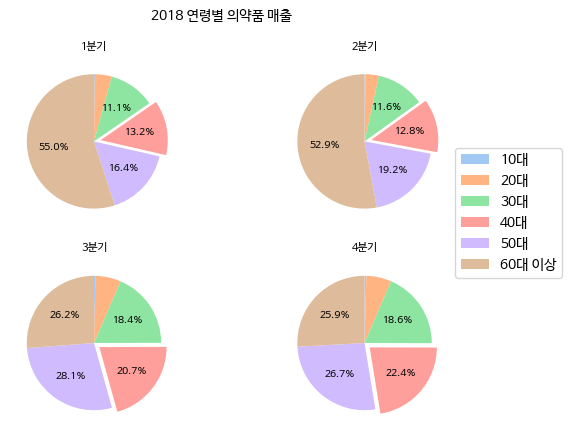

In [ ]:
exp = [0, 0, 0, 0.1, 0, 0]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
time = '2018'
colors = sns.color_palette('pastel')[0:6]

def customPct(pct):
    return('%.1f%%'%pct)if pct >= 8 else''
plt.suptitle(f'{time} 연령별 의약품 매출',fontsize=10)

plt.subplot(2, 2, 1)
plt.pie(sangil_med_age[time +'_1'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('1분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 2)
plt.pie(sangil_med_age[time +'_2'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.legend(labels, bbox_to_anchor=(1, 0.5))
plt.title('2분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 3)
plt.pie(sangil_med_age[time +'_3'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('3분기', loc='center', fontsize = 8)


plt.subplot(2, 2, 4)
plt.pie(sangil_med_age[time +'_4'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('4분기', loc='center', fontsize = 8)

plt.show()

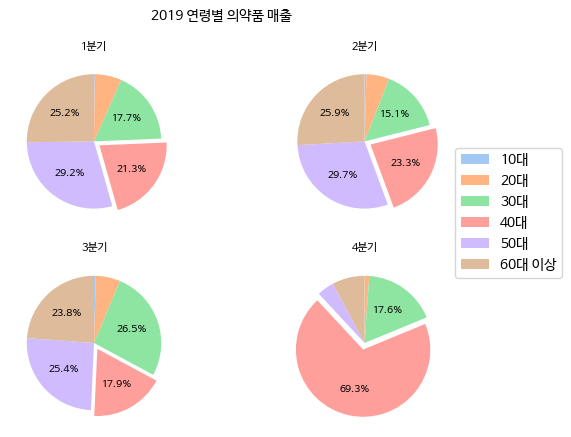

In [ ]:
exp = [0, 0, 0, 0.1, 0, 0]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
time = '2019'
colors = sns.color_palette('pastel')[0:6]

def customPct(pct):
    return('%.1f%%'%pct)if pct >= 8 else''
plt.suptitle(f'{time} 연령별 의약품 매출',fontsize=10)

plt.subplot(2, 2, 1)
plt.pie(sangil_med_age[time +'_1'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('1분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 2)
plt.pie(sangil_med_age[time +'_2'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.legend(labels, bbox_to_anchor=(1, 0.5))
plt.title('2분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 3)
plt.pie(sangil_med_age[time +'_3'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('3분기', loc='center', fontsize = 8)


plt.subplot(2, 2, 4)
plt.pie(sangil_med_age[time +'_4'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('4분기', loc='center', fontsize = 8)

plt.show()

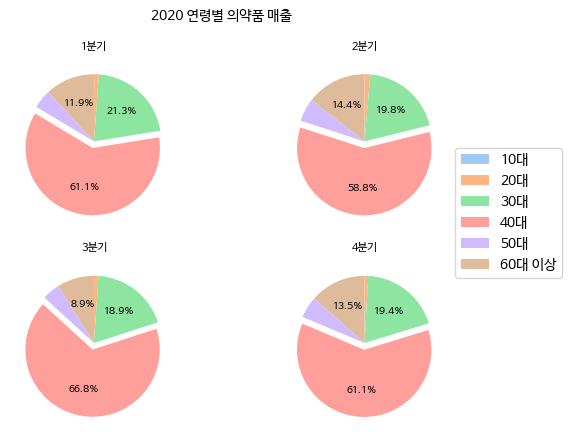

In [ ]:
exp = [0, 0, 0, 0.1, 0, 0]
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
time = '2020'
colors = sns.color_palette('pastel')[0:6]

def customPct(pct):
    return('%.1f%%'%pct)if pct >= 8 else''
plt.suptitle(f'{time} 연령별 의약품 매출',fontsize=10)

plt.subplot(2, 2, 1)
plt.pie(sangil_med_age[time +'_1'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('1분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 2)
plt.pie(sangil_med_age[time +'_2'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.legend(labels, bbox_to_anchor=(1, 0.5))
plt.title('2분기', loc='center', fontsize = 8)

plt.subplot(2, 2, 3)
plt.pie(sangil_med_age[time +'_3'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('3분기', loc='center', fontsize = 8)


plt.subplot(2, 2, 4)
plt.pie(sangil_med_age[time +'_4'],
        autopct=customPct,
        explode=exp,
        startangle = 90,
        counterclock=False,
        textprops={'fontsize': 7.5},
        colors= colors)
plt.title('4분기', loc='center', fontsize = 8)

plt.show()